## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



In [60]:
# import nessecary libraries
import pandas as pd
from pathlib import Path
%matplotlib inline

In [ ]:
# Import dataframes and check if it was properly imported

In [76]:
# Read in the CSV file called "bitstamp.csv" from Resources folder
bitstamp_df = pd.read_csv(Path("Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)
display(bitstamp_df.head())
display(bitstamp_df.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


In [75]:
# Read in the CSV file called "coinbase.csv" from Resouces folder
coinbase_df = pd.read_csv(Path("Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)
display(coinbase_df.head())
display(coinbase_df.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


In [ ]:
# Check data for null values and types and duplicates
display(bitstamp_df.isnull().sum())
display(bitstamp_df.dtypes)
display(bitstamp_df.duplicated().sum())
display(coinbase_df.isnull().sum())
display(coinbase_df.dtypes)
display(coinbase_df.duplicated().sum())

In [ ]:
# null values found in both based of the data size vs null values should be alright to drop.
# close column dtypes for both df are object values after reviewing need to remove $ sign and change type to float.
# no duplicate data can be seen in either df.

In [86]:
# drop null values since the dataframe is massive enough not to be affected
bitstamp_df = bitstamp_df.dropna()
coinbase_df = coinbase_df.dropna()
# Check that all values have been dropped
display(bitstamp_df.isnull().sum())
display(coinbase_df.isnull().sum())

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [87]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df['Close'] = bitstamp_df["Close"].str.replace('$','')
coinbase_df['Close'] = coinbase_df["Close"].str.replace('$','')
display(bitstamp_df.head())
display(coinbase_df.head())

C:\Users\webst\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\webst\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [88]:
# Convert the Close data type to a float
bitstamp_df['Close'] = bitstamp_df['Close'].astype('float')
coinbase_df['Close'] = coinbase_df['Close'].astype('float')
display(bitstamp_df.dtypes)
display(coinbase_df.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

In [101]:
# overview of data with describe function 
display(bitstamp_df.describe(include='all'))
display(coinbase_df.describe(include='all'))

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'bitstamp vs coinbase'}, xlabel='Timestamp'>

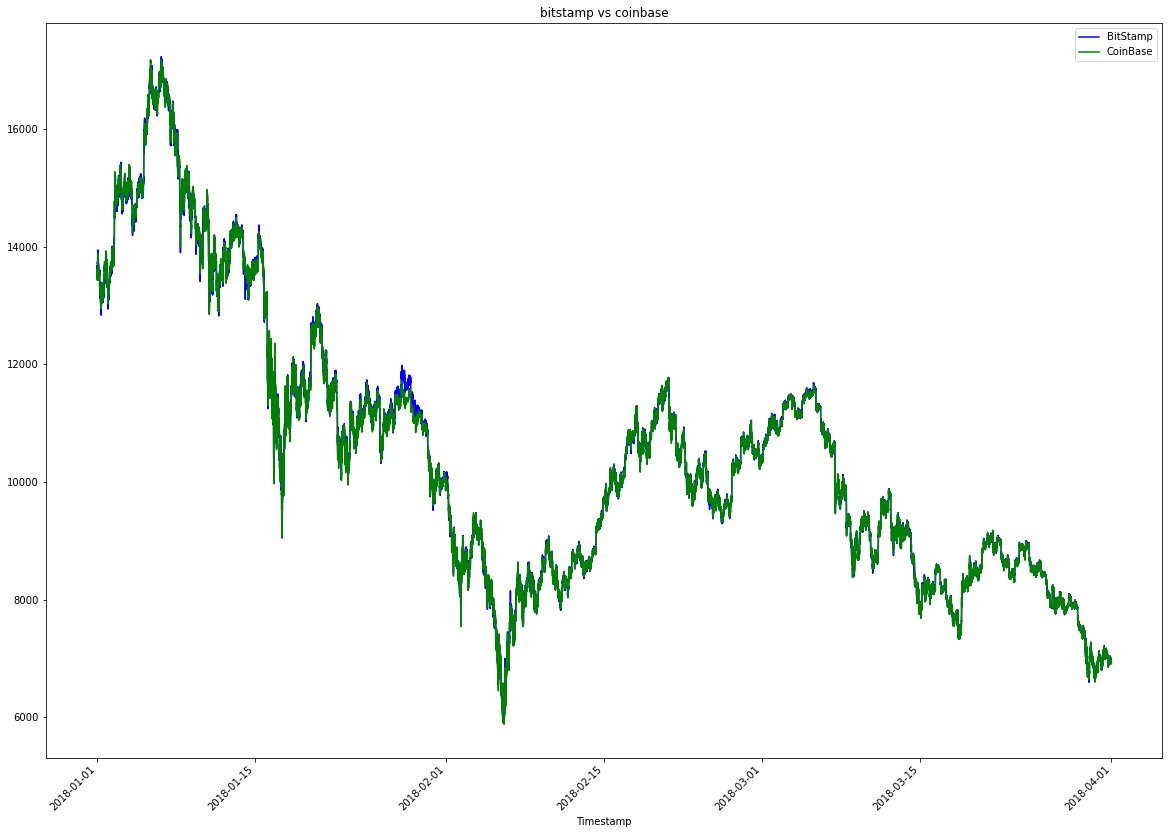

In [105]:
# Overlay plots to look for arbitrage points using closing column
bitstamp_df['Close'].plot(kind='line', figsize=(20,15), title="bitstamp vs coinbase", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_df['Close'].plot(kind='line', figsize=(20,15), title="bitstamp vs coinbase", color="green", legend=True, label="CoinBase", rot=45)

In [106]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_close_sliced = bitstamp_df.loc[:,'Close']
bitstamp_close_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [109]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_close_sliced = coinbase_df.loc[:,'Close']
coinbase_close_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [144]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_df.loc[:,'Close'].describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [143]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_df.loc[:,'Close'].describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices Jan-Mar 2018'}, xlabel='Timestamp'>

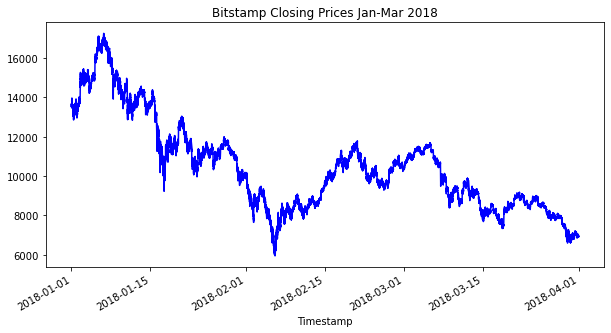

In [130]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_close_sliced.plot(kind='line', figsize=(10,5), title="Bitstamp Closing Prices Jan-Mar 2018", color='blue')

<AxesSubplot:title={'center':'CoinBase Closing Prices Jan-Mar 2018'}, xlabel='Timestamp'>

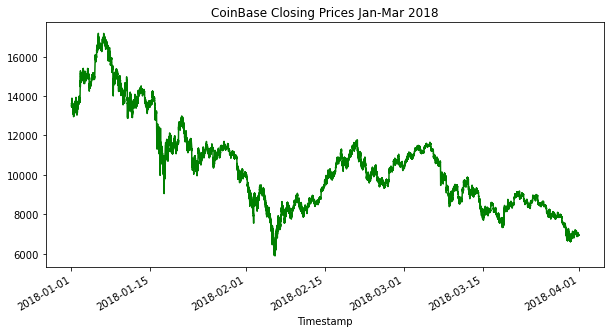

In [131]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_close_sliced.plot(kind='line', figsize=(10,5), title="CoinBase Closing Prices Jan-Mar 2018", color='green')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices Jan-Mar 2018'}, xlabel='Timestamp'>

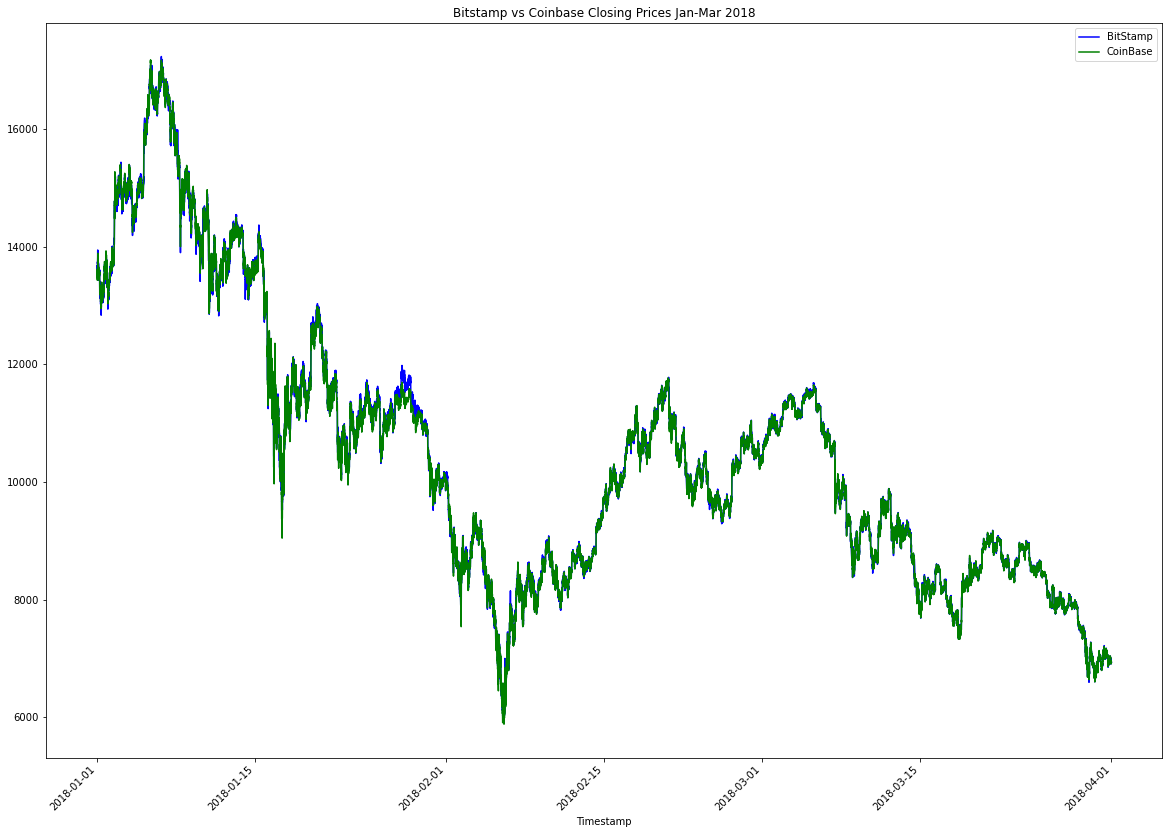

In [132]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_close_sliced.plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-Mar 2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-Mar 2018", color="green", legend=True, label="CoinBase", rot=45)

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices Jan-2018'}, xlabel='Timestamp'>

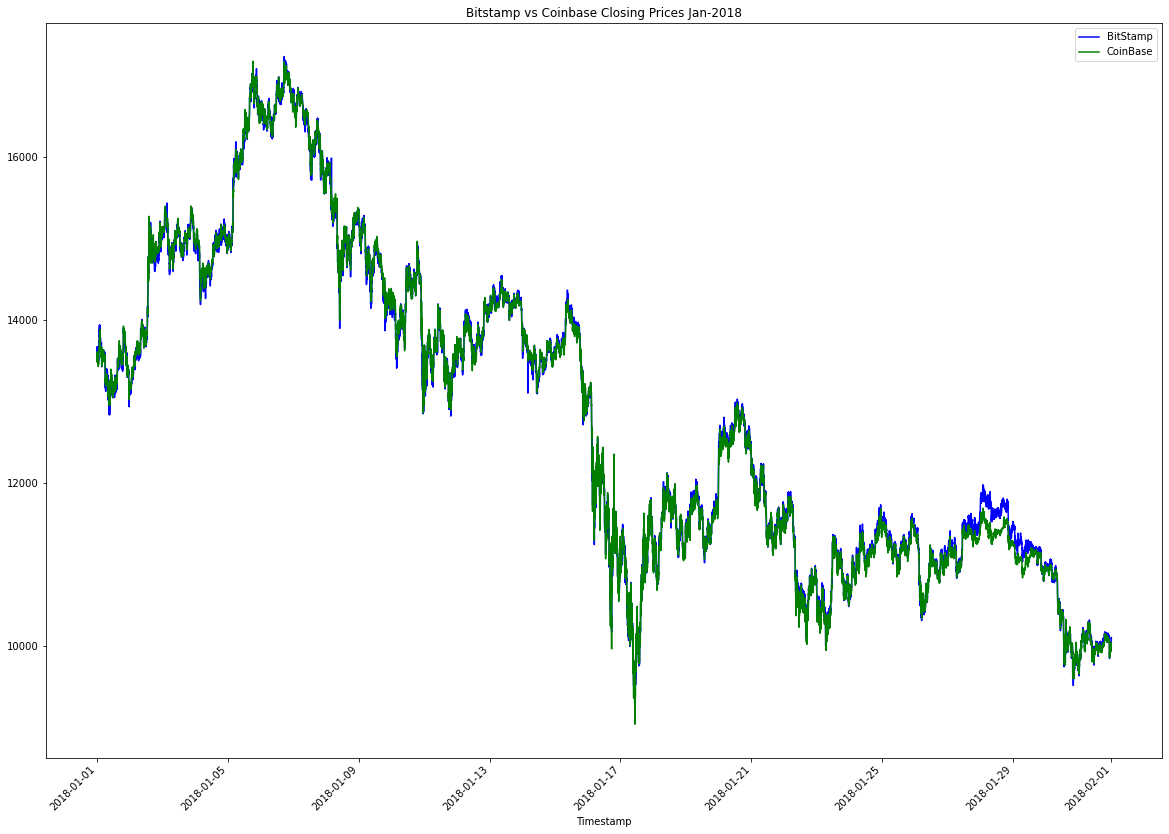

In [133]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_close_sliced.loc['2018-01'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.loc['2018-01'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-2018", color="green", legend=True, label="CoinBase", rot=45)

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices March 2018'}, xlabel='Timestamp'>

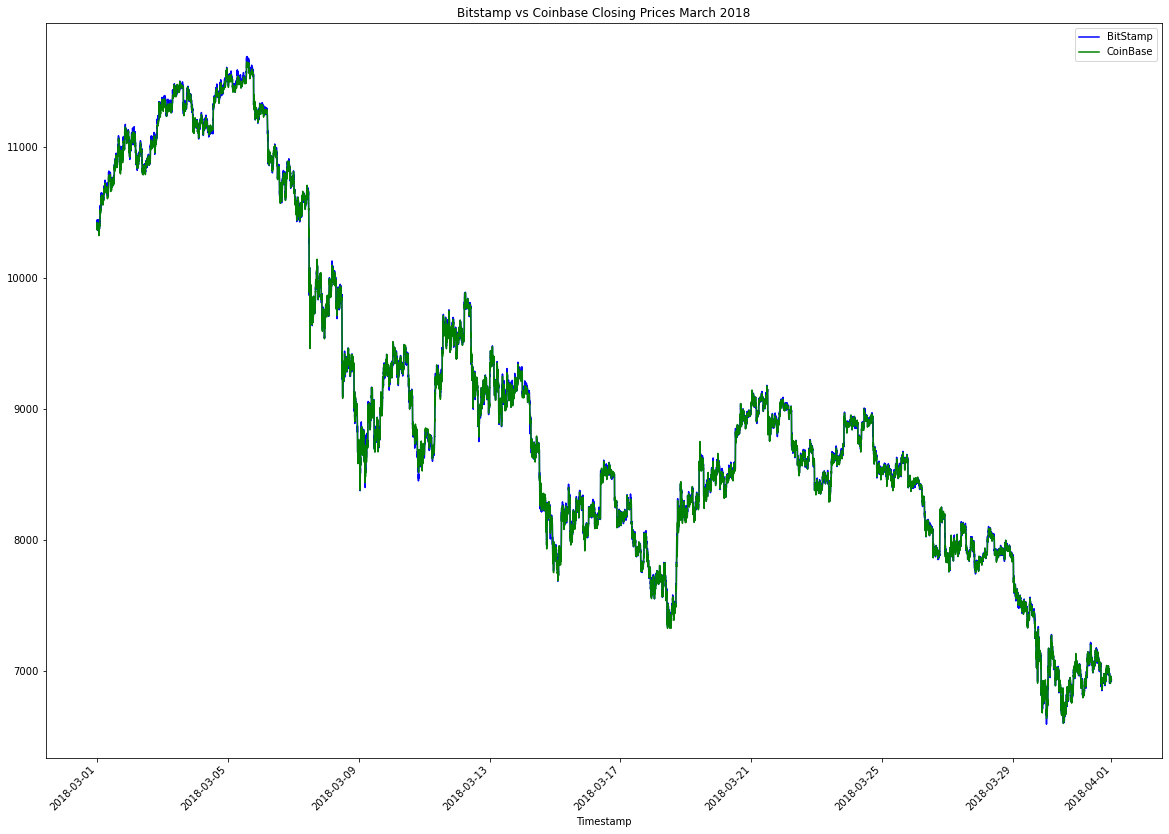

In [155]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_close_sliced.loc['2018-03'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices March 2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.loc['2018-03'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices March 2018", color="green", legend=True, label="CoinBase", rot=45)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** There have been spikes where the prices are vastly different between the two crypto exchanges but otherwise the spread has been fairly constant in this test data.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices Jan-27-28 19-19 2018'}, xlabel='Timestamp'>

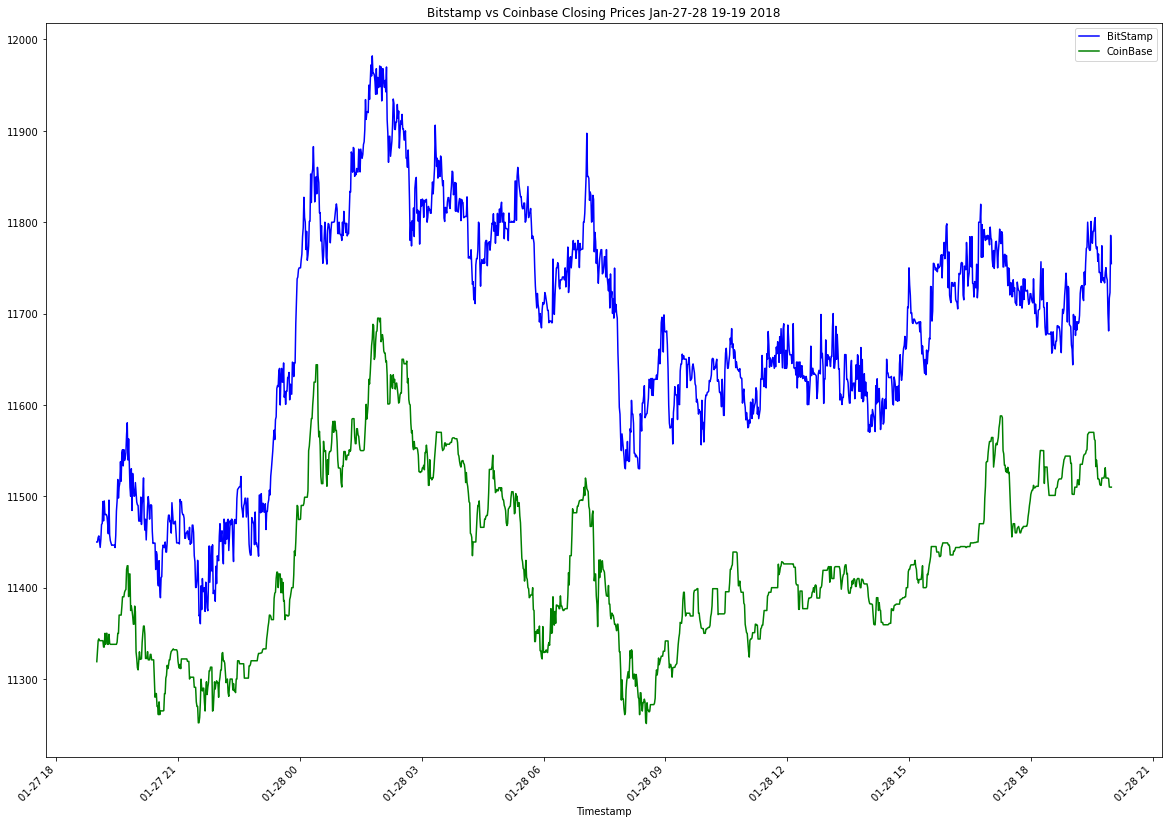

In [141]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_close_sliced.loc['2018-01-27 19':'2018-01-28 19'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-27-28 19-19 2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.loc['2018-01-27 19':'2018-01-28 19'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Jan-27-28 19-19 2018", color="green", legend=True, label="CoinBase", rot=45)

In [147]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_close_sliced.loc['2018-01-27 19':'2018-01-28 19'] - coinbase_close_sliced.loc['2018-01-27 19':'2018-01-28 19']
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1490.000000
mean      245.720570
std        67.133752
min        83.790000
25%       202.145000
50%       249.675000
75%       289.945000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spead - Jan 27-28 19-19 2018'}>

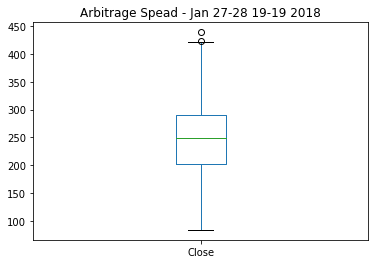

In [148]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title='Arbitrage Spead - Jan 27-28 19-19 2018')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices Feb-07-2018'}, xlabel='Timestamp'>

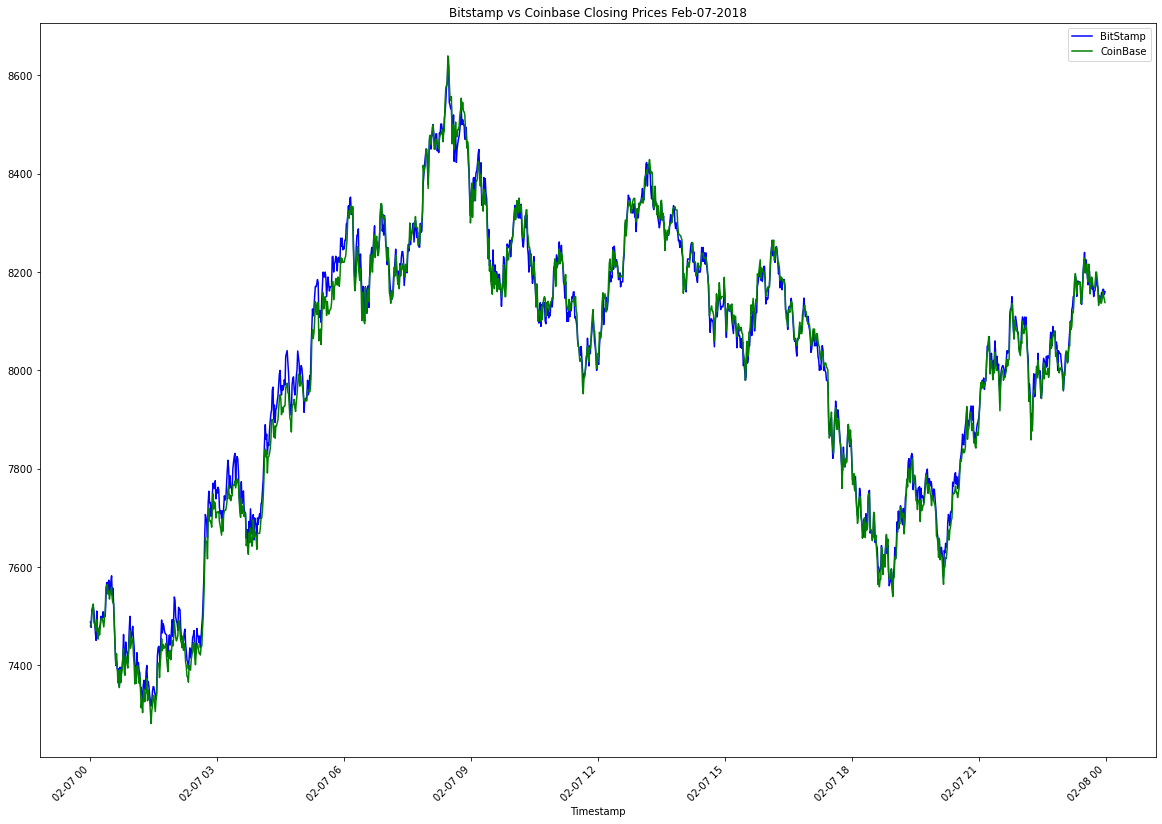

In [150]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_close_sliced.loc['2018-02-07'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Feb-07-2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.loc['2018-02-07'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices Feb-07-2018", color="green", legend=True, label="CoinBase", rot=45)

In [152]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_close_sliced.loc['2018-02-07'] - coinbase_close_sliced.loc['2018-02-07']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1434.000000
mean        8.034840
std        21.032647
min       -55.410000
25%        -6.025000
50%         7.005000
75%        21.900000
max        69.570000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Feb-07-2018'}>

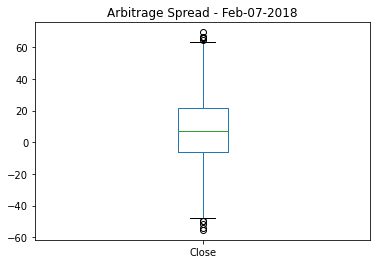

In [153]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread - Feb-07-2018")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closing Prices March-05-2018'}, xlabel='Timestamp'>

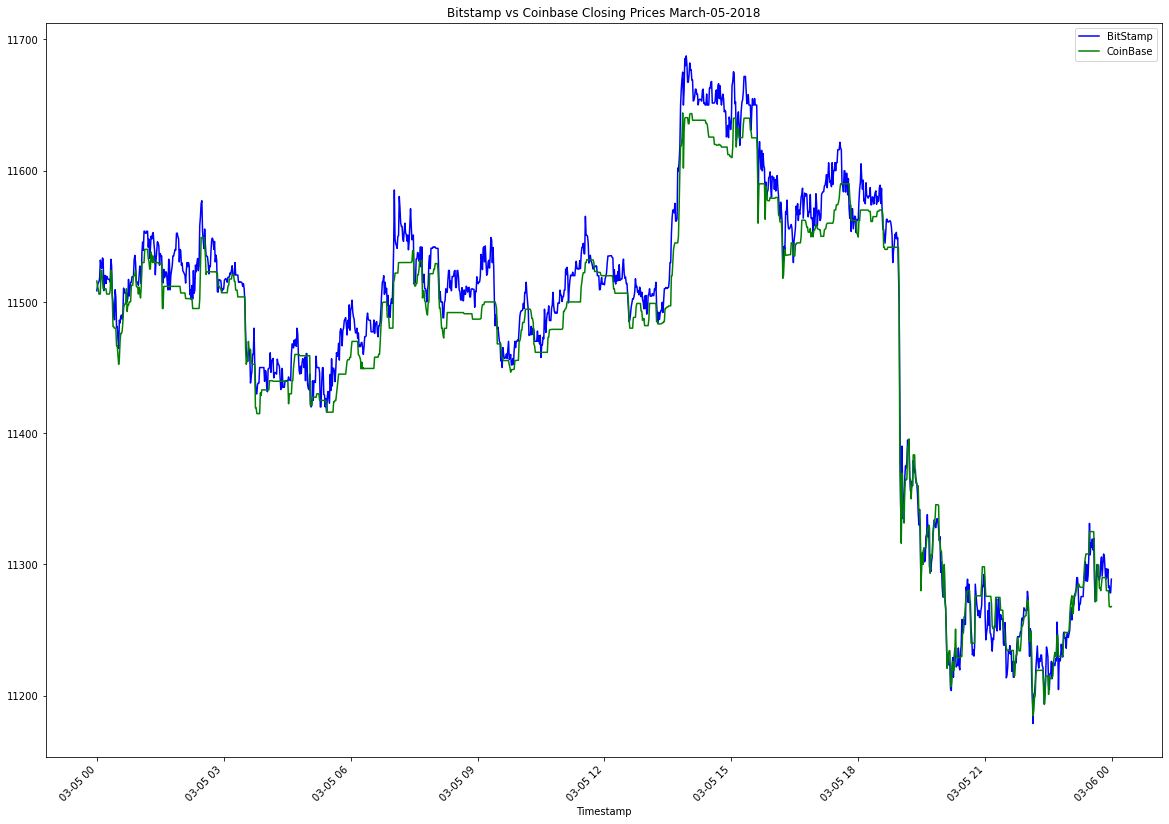

In [159]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_close_sliced.loc['2018-03-05'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices March-05-2018", color="blue", legend=True, label="BitStamp", rot=45)
coinbase_close_sliced.loc['2018-03-05'].plot(kind='line', figsize=(20,15), title="Bitstamp vs Coinbase Closing Prices March-05-2018", color="green", legend=True, label="CoinBase", rot=45)

In [160]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_close_sliced.loc['2018-03-05'] - coinbase_close_sliced.loc['2018-03-05']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - March-05-2018'}>

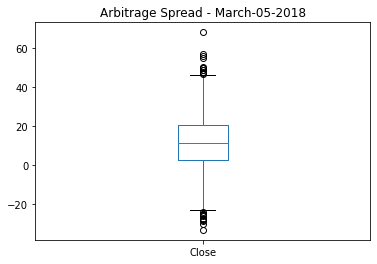

In [161]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title="Arbitrage Spread - March-05-2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

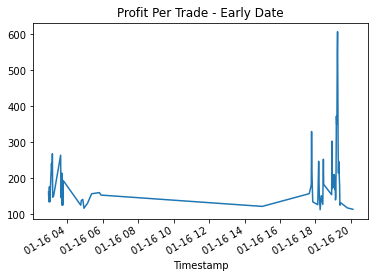

In [35]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [36]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

14147.169999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

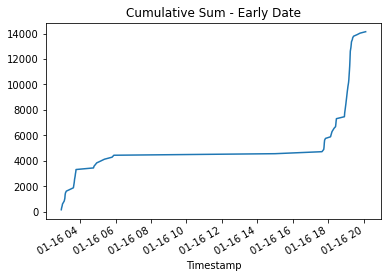

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE